# Reproduction of Published Seismometer-Derived Tilt Results From Volcan de Fuego

Lyons, J. J., Waite, G. P., Ichihara, M., and Lees, J. M. (2012), Tilt prior to explosions and the effect of topography on ultra-long-period seismic records at Fuego volcano, Guatemala, Geophys. Res. Lett., 39, L08305, doi:10.1029/2012GL051184.

Replicating Figure 2, panels a and b.

## Download seismic data with PySEP

PySEP configuration file

In [1]:
!cat ./fuego2009_pysep_config.yaml

event_tag: Fuego2009
client: IRIS
client_debug: false
event_selection: default
seconds_before_ref: 3600
seconds_after_ref: 3600
networks: XT
stations: F900,F9NE
channels: HHE,HHN
locations: '*'
demean: false
detrend: false
remove_response: false
resample_freq: null
remove_clipped: true
remove_insufficient_length: true
remove_masked_data: true
write_files: inv,sac
plot_files: null
log_level: WARNING



List of events

Format:
time longitude latitude depth magnitude

The longitude, latitude, depth, and magnitude fields are required by PySEP which was built with earthquakes in mind. Time, longitude, and latitude used by PySEP to name the directories with downloaded data/

In [2]:
!cat ./fuego2009_events.txt

2009/01/11T22:40:51.365000 -90.8806 14.4747 0 0
2009/01/19T16:09:34.995000 -90.8806 14.4747 0 0
2009/01/19T16:09:35.145000 -90.8806 14.4747 0 0
2009/01/21T01:53:01.285000 -90.8806 14.4747 0 0
2009/01/21T05:21:18.855000 -90.8806 14.4747 0 0
2009/01/22T09:22:33.465000 -90.8806 14.4747 0 0
2009/01/22T16:24:32.325000 -90.8806 14.4747 0 0
2009/01/24T11:56:46.705000 -90.8806 14.4747 0 0
2009/01/24T11:56:46.805000 -90.8806 14.4747 0 0


In [3]:
!pysep -c ./fuego2009_pysep_config.yaml -E ./fuego2009_events.txt -o

[2023-09-08 13:41:11] - pysep - INFO: looping over 9 events for event file run
[2023-09-08 13:41:11] - pysep - INFO: will NOT overwrite event search parameters (including origin and reference time) with config file
[2023-09-08 13:41:11] - pysep - INFO: overwriting default parameters with config file: './fuego2009_pysep_config.yaml'
[2023-09-08 13:41:11] - pysep - DEBUG: event_tag: None -> Fuego2009
[2023-09-08 13:41:11] - pysep - DEBUG: seconds_before_ref: 100 -> 3600
[2023-09-08 13:41:11] - pysep - DEBUG: seconds_after_ref: 300 -> 3600
[2023-09-08 13:41:11] - pysep - DEBUG: networks: * -> XT
[2023-09-08 13:41:11] - pysep - DEBUG: stations: * -> F900,F9NE
[2023-09-08 13:41:11] - pysep - DEBUG: channels: * -> HHE,HHN
[2023-09-08 13:41:11] - pysep - DEBUG: demean: True -> False
[2023-09-08 13:41:11] - pysep - DEBUG: detrend: True -> False
[2023-09-08 13:41:11] - pysep - DEBUG: remove_response: True -> False
[2023-09-08 13:41:11] - pysep - DEBUG: remove_clipped: False -> True
[2023-09-08 

## Run SeiNei to estimate tilt

In [4]:
!seinei ./2009-01-11T224051_GUATEMALA/inv.xml ./2009*GUATEMALA/SAC/2009*.sac -pbl 28800

## Make plots

In [5]:
import obspy
import matplotlib.pyplot as plt
import numpy as np
import glob

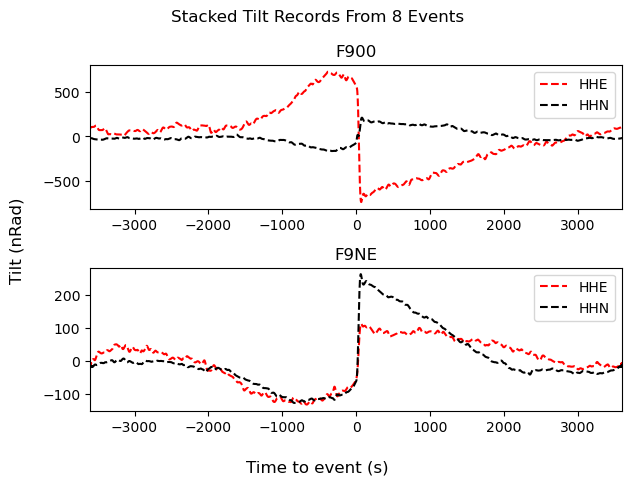

In [6]:
# Load tilt estimates
stTilt = obspy.core.stream.Stream()
for file in glob.glob("./2009*GUATEMALA/SAC/tilt*.sac"):
    stTilt += obspy.read(file)

stations = ["F900", "F9NE"]
channels = ["HHE", "HHN"]
style = ["r--", "k--"]

fig, axs = plt.subplots(2, 1)
for i, sta in enumerate(stations):
    for j, ch in enumerate(channels):
        tilts = stTilt.select(station=sta, channel=ch)
        stack = np.zeros(len(tilts[0]))
        for tilt in tilts:
            stack += tilt.data
        stack /= len(tilts)
        axs[i].plot(np.arange(len(stack)) - len(stack)//2, stack*1e9, style[j], label=ch)
        axs[i].set_title(sta)
        axs[i].set_xlim(-len(stack)//2, len(stack)//2)
        axs[i].legend()

fig.supylabel("Tilt (nRad)")
fig.supxlabel("Time to event (s)")
fig.suptitle("Stacked Tilt Records From %d Events" % len(stTilt.select(station=sta, channel=ch)))
fig.tight_layout()